Step 1 : Function for ploting the image

In [1]:
import matplotlib.pyplot as plt

def show_image(img, title="Image", cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

Step 2 : Preprocessing preview for nut

C:\Users\vigne\Desktop\CW2_ML_PDE4433\Dataset\M12_nut


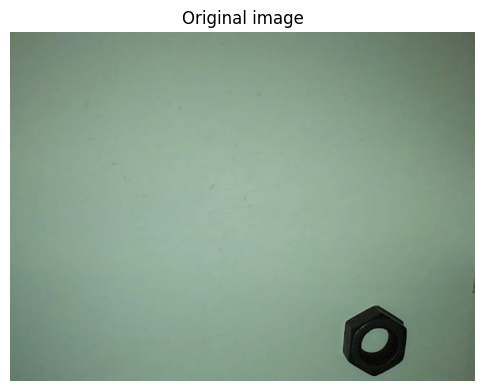

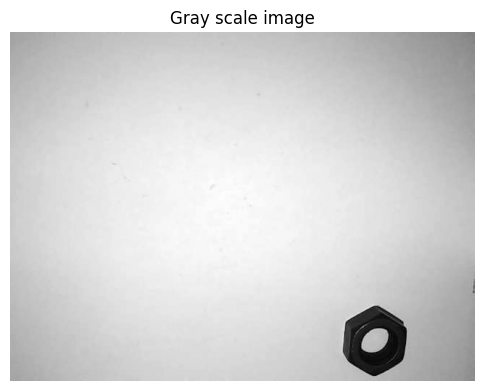

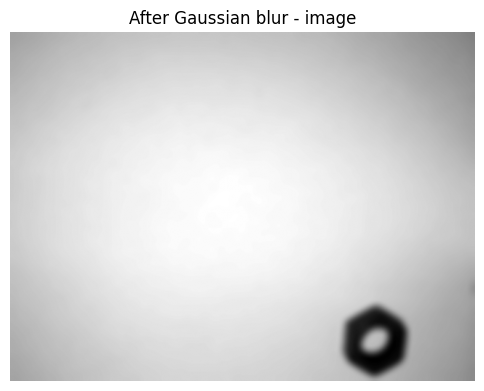

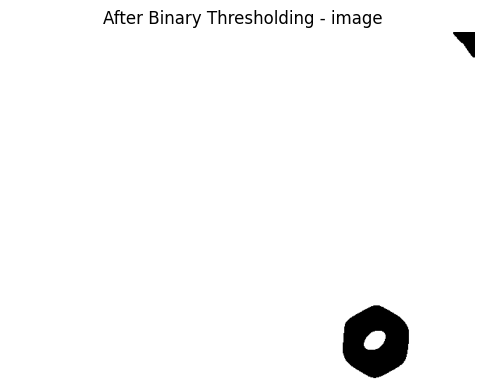

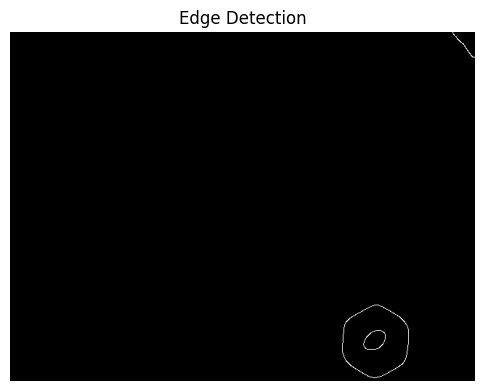

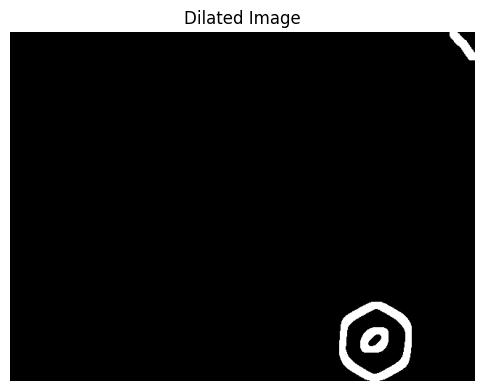

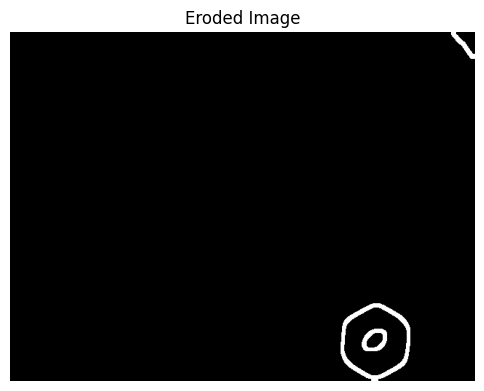

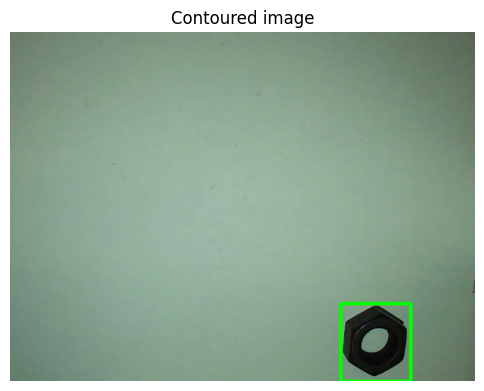

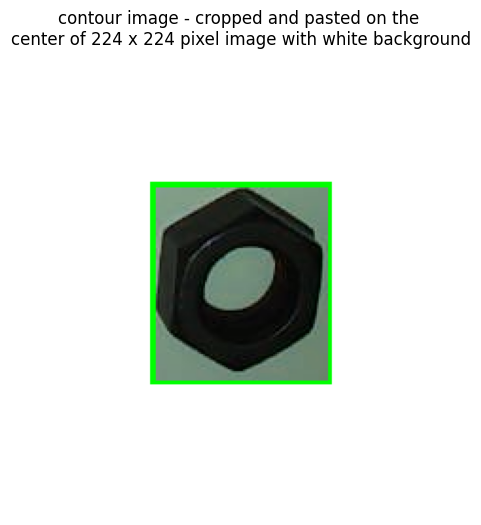

In [29]:
#sample of image preprocessing for nut
import cv2
import numpy as np
import tensorflow as tf
import time
from pathlib import Path
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# using current working directory
base_dir = Path.cwd()
Test_dir = base_dir / "Dataset" / "M12_nut"
print(Test_dir)

test=6
value=str(test)
image = Test_dir / f"{value}.jpg" 

test_image = cv2.imread(image)
show_image(test_image,"Original image",cmap="grey")

gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
show_image(gray,"Gray scale image",cmap="grey")

blurred = cv2.GaussianBlur(gray, (19, 19), 5)
show_image(blurred,"After Gaussian blur - image",cmap="grey")

_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
show_image(thresh,"After Binary Thresholding - image",cmap="grey")

edges = cv2.Canny(thresh, 100, 200)
show_image(edges,"Edge Detection",cmap="grey")

kernel = np.ones((5, 5), np.uint8)

dilated = cv2.dilate(edges, kernel, iterations=2)
show_image(dilated,"Dilated Image",cmap="grey")

eroded = cv2.erode(dilated, kernel, iterations=1)
show_image(eroded,"Eroded Image",cmap="grey")

contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Process only if we have at least one valid contour
for cnt in contours:
    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(test_image, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
    
    if area > 500:  # Filter small areas
        #x, y, w, h = cv2.boundingRect(cnt)
        show_image(test_image,"Contoured image",cmap="grey")
        cropped = test_image[y:y+h, x:x+w]

        output_size = 244
        white_bg = np.ones((output_size, output_size, 3), dtype=np.uint8) * 255

        # Ensure cropped size fits
        ch, cw = cropped.shape[:2]
        if ch <= output_size and cw <= output_size:
            y_offset = (output_size - ch) // 2
            x_offset = (output_size - cw) // 2

            white_bg[y_offset:y_offset+ch, x_offset:x_offset+cw] = cropped

            show_image(white_bg,"contour image - cropped and pasted on the \ncenter of 224 x 224 pixel image with white background",cmap="grey")

Step 3 : Preprocessing preview for bolt

C:\Users\vigne\Desktop\CW2_ML_PDE4433\Dataset\M8_bolt


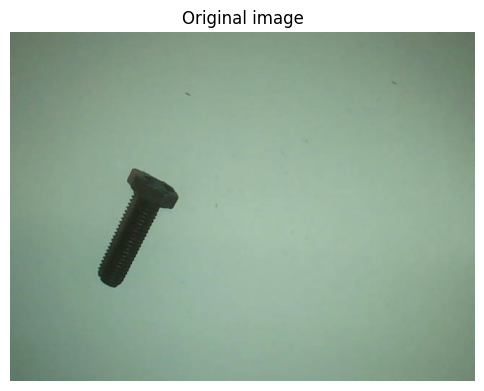

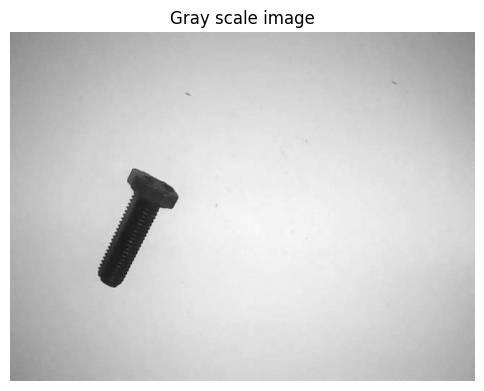

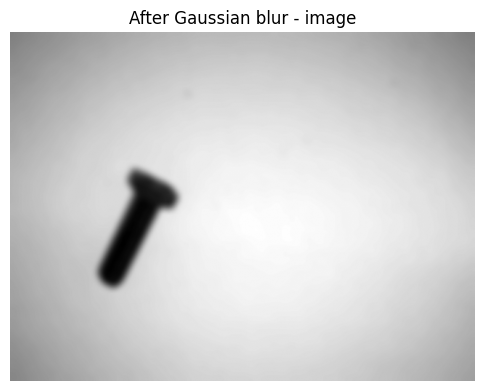

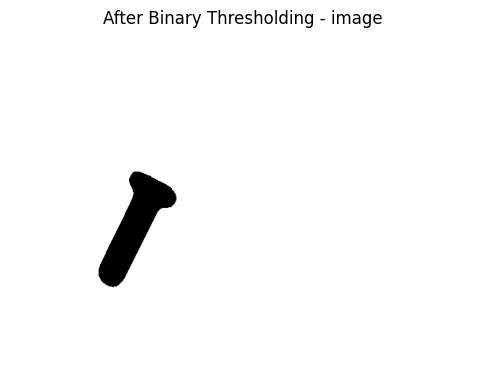

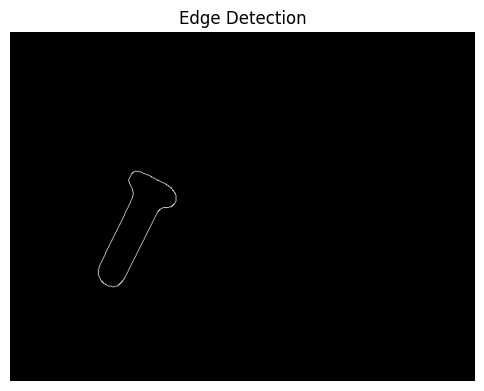

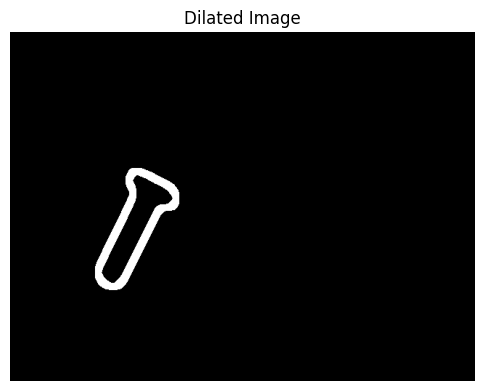

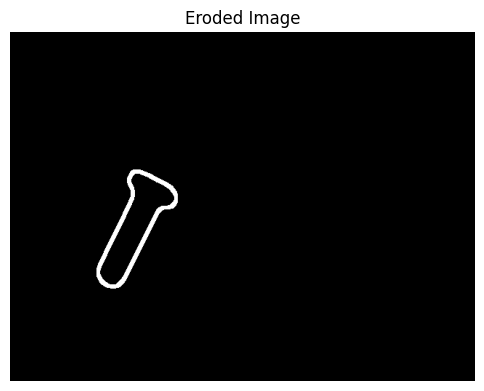

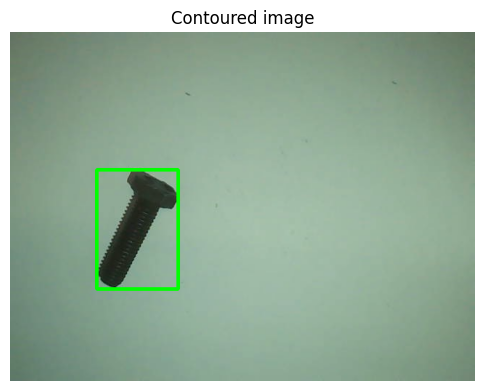

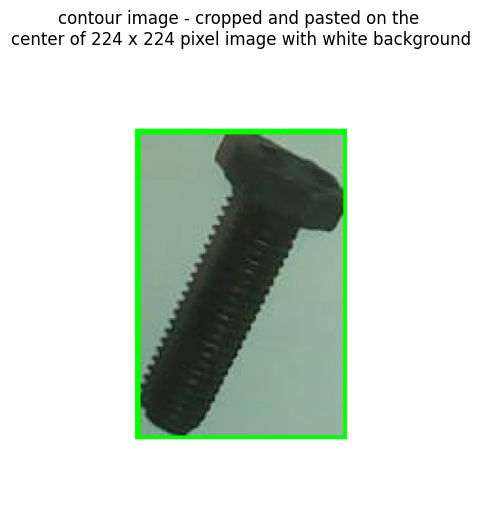

In [28]:
#sample of image preprocessing for bolt
import cv2
import numpy as np
import tensorflow as tf
import time
from pathlib import Path
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# using current working directory
base_dir = Path.cwd()
Test_dir = base_dir / "Dataset" / "M8_bolt"
print(Test_dir)

test=6
value=str(test)
image = Test_dir / f"{value}.jpg" 

test_image = cv2.imread(image)
show_image(test_image,"Original image",cmap="grey")

gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
show_image(gray,"Gray scale image",cmap="grey")

blurred = cv2.GaussianBlur(gray, (19, 19), 5)
show_image(blurred,"After Gaussian blur - image",cmap="grey")

_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
show_image(thresh,"After Binary Thresholding - image",cmap="grey")

edges = cv2.Canny(thresh, 100, 200)
show_image(edges,"Edge Detection",cmap="grey")

kernel = np.ones((5, 5), np.uint8)

dilated = cv2.dilate(edges, kernel, iterations=2)
show_image(dilated,"Dilated Image",cmap="grey")

eroded = cv2.erode(dilated, kernel, iterations=1)
show_image(eroded,"Eroded Image",cmap="grey")

contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Process only if we have at least one valid contour
for cnt in contours:
    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(test_image, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
    
    if area > 500:  # Filter small areas
        #x, y, w, h = cv2.boundingRect(cnt)
        show_image(test_image,"Contoured image",cmap="grey")
        cropped = test_image[y:y+h, x:x+w]

        output_size = 244
        white_bg = np.ones((output_size, output_size, 3), dtype=np.uint8) * 255

        # Ensure cropped size fits
        ch, cw = cropped.shape[:2]
        if ch <= output_size and cw <= output_size:
            y_offset = (output_size - ch) // 2
            x_offset = (output_size - cw) // 2

            white_bg[y_offset:y_offset+ch, x_offset:x_offset+cw] = cropped

            show_image(white_bg,"contour image - cropped and pasted on the \ncenter of 224 x 224 pixel image with white background",cmap="grey")